<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/Hello_World_of_deep_learning_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A first look at a neural network



---



> [Source](https://github.com/lovnishverma/Python-Getting-Started/blob/main/Books/deeplearningwithpython.pdf)



Let’s look at a concrete example of a neural network that uses the Python library Keras
to learn to classify handwritten digits.

 The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9). We’ll use the MNIST
dataset, a classic in the machine-learning community, which has been around almost
as long as the field itself and has been intensively studied. It’s a set of 60,000 training
images, plus 10,000 test images, assembled by the National Institute of Standards and
Technology (the NIST in MNIST) in the 1980s. You can think of “solving” MNIST as the
“Hello World” of deep learning—it’s what you do to verify that your algorithms are
working as expected. As you become a machine-learning practitioner, you’ll see
MNIST come up over and over again, in scientific papers, blog posts, and so on. You
can see some MNIST samples in figure below.

**Note on classes and labels**

In machine learning, a category in a classification problem is called a class. Data
points are called samples. The class associated with a specific sample is called a
label.

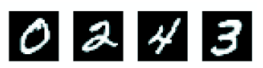

 The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy
arrays.

**Loading the MNIST dataset in Keras**

In [113]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

*train_images* and *train_labels* form the *training set*, the data that the model will
learn from. The model will then be tested on the *test set*, *test_images* and *test_labels*.

The images are encoded as Numpy arrays, and the labels are an array of digits, ranging
from 0 to 9. The images and labels have a one-to-one correspondence.

**Let’s look at the training data:**

In [114]:
train_images.shape

(60000, 28, 28)

In [115]:
len(train_labels)

60000

In [116]:
len(train_labels)

60000

**And here’s the test data:**

In [117]:
test_images.shape

(10000, 28, 28)

In [118]:
len(test_labels)

10000

In [119]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

The workflow will be as follows: First, we’ll feed the neural network the training data,
train_images and train_labels. The network will then learn to associate images and
labels. Finally, we’ll ask the network to produce predictions for test_images, and we’ll
verify whether these predictions match the labels from test_labels.

**The network architecture**

In [120]:
from keras import models, layers

network = models.Sequential()

# First layer: use Input layer explicitly
network.add(layers.Input(shape=(28*28,)))

# Hidden layer: 512 neurons, ReLU activation
network.add(layers.Dense(512, activation='relu'))

# Output layer: 10 neurons, softmax activation
network.add(layers.Dense(10, activation='softmax'))

The core building block of neural networks is the layer, a data-processing module that
you can think of as a filter for data. Some data goes in, and it comes out in a more useful form. Specifically, layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand. Most of
deep learning consists of chaining together simple layers that will implement a form
of progressive data distillation. A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters—the layers.
 Here, our network consists of a sequence of two Dense layers, which are densely
connected (also called fully connected) neural layers. The second (and last) layer is a
10-way softmax layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to
one of our 10 digit classes.

*To make the network ready for training, we need to pick three more things, as part
of the compilation step:*

* **A loss function**—How the network will be able to measure its performance on
the training data, and thus how it will be able to steer itself in the right direction.

* **An optimizer**—The mechanism through which the network will update itself
based on the data it sees and its loss function.

* **Metrics** to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

**The compilation step**

In [121]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape the network
expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type
uint8 with values in the [0, 255] interval. We transform it into a float32 array of
shape (60000, 28 * 28) with values between 0 and 1.

**Preparing the image data**

In [122]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

**We also need to categorically encode the labels.**

**Preparing the labels**

In [123]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We’re now ready to train the network, which in Keras is done via a call to the network’s fit method—we fit the model to its training data:

In [124]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8707 - loss: 0.4433
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9664 - loss: 0.1157
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9781 - loss: 0.0733
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9846 - loss: 0.0514
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9894 - loss: 0.0378


Two quantities are displayed during training: the loss of the network over the training
data, and the accuracy of the network over the training data.
 We quickly reach an accuracy of 0.989 (98.9%) on the training data. Now let’s
check that the model performs well on the test set, too:

In [125]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0772


In [126]:
print('test_acc:', test_acc)

test_acc: 0.9810000061988831

The test-set accuracy turns out to be 97.8%—that’s quite a bit lower than the training
set accuracy. This gap between training accuracy and test accuracy is an example of
overfitting: the fact that machine-learning models tend to perform worse on new data
than on their training data. Overfitting is a central topic in chapter 3.
 This concludes our first example—you just saw how you can build and train a neural network to classify handwritten digits in less than 20 lines of Python code. In the
next chapter, I’ll go into detail about every moving piece we just previewed and clarify
what’s going on behind the scenes. You’ll learn about tensors, the data-storing objects
going into the network; tensor operations, which layers are made of; and gradient
descent, which allows your network to learn from its training examples.

# Test with Some Images

In [127]:
import numpy as np
from PIL import Image
from google.colab import files

# Upload an image file
uploaded = files.upload()  # Prompts user to choose file

for filename in uploaded.keys():
    # Open the uploaded image
    img = Image.open(filename).convert('L').resize((28, 28))  # Grayscale, 28x28

    # Convert to numpy array and normalize
    img_array = np.array(img).astype('float32') / 255

    # Flatten to match the network input shape (1, 784)
    img_array = img_array.reshape(1, 28*28)

    # Predict using your trained model
    predictions = network.predict(img_array)
    predicted_class = np.argmax(predictions)

    print(f"Uploaded image: {filename}")
    print("Predicted digit:", predicted_class)


Saving test on image of 7.png to test on image of 7 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Uploaded image: test on image of 7 (1).png

Predicted digit: 7

**Save Model (Optional for future use)**

In [128]:
network.save("mnist_model.keras")
print("Model saved as mnist_model.keras")

Model saved as mnist_model.keras

**Load Model**

In [129]:
from keras.models import load_model

# Load the saved model
network = load_model("mnist_model.keras")  # or "mnist_model.h5
print("Model loaded successfully")

Model loaded successfully

**Predict using loaded model**

In [130]:
predictions = network.predict(img_array)
predicted_class = np.argmax(predictions)
print("Predicted digit:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Predicted digit: 7